In [4]:
from PIL import Image
import numpy as np
import matplotlib
from io import BytesIO
import base64
from sklearn.utils.multiclass import unique_labels
import tensorflow as tf
import os
import cv2
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


model = tf.keras.models.load_model("my_finalyear_alzhiemer_project_main_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             2

 Total params: 13,647,108 (52.06 MB)

 Trainable params: 6,822,849 (26.03 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 6,822,851 (26.03 MB)

In [5]:
performance_metrics = {
    'accuracy': None,
    'precision': None,
    'recall': None,
    'f1': None
}


50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 857ms/step


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 83.625%
Precision: 82.03389830508473%
Recall: 75.625%
F1-score: 78.69918699186992
KS Statistic: 0.6515625


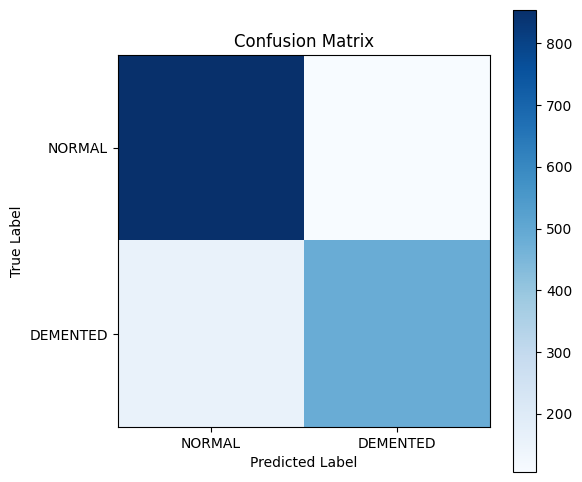

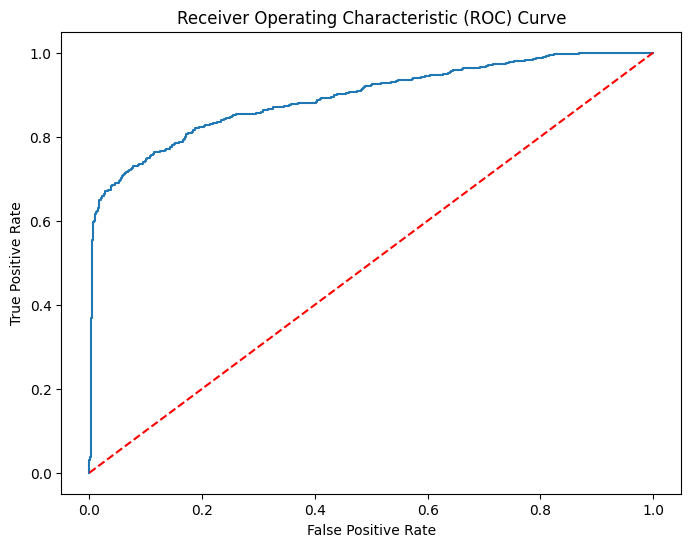

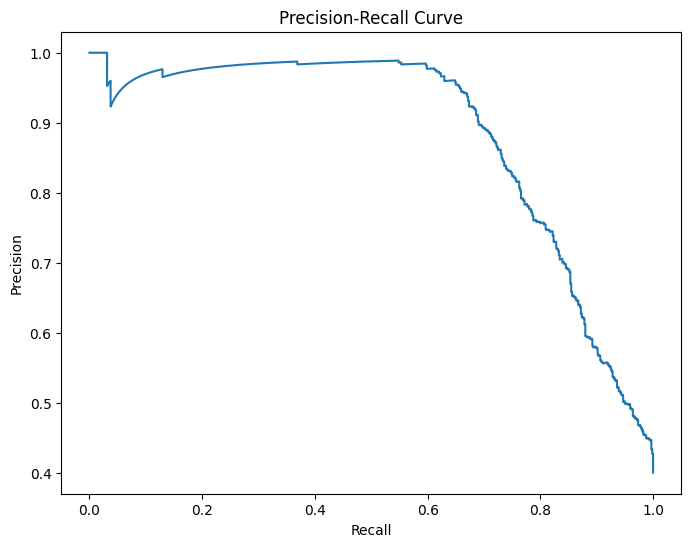

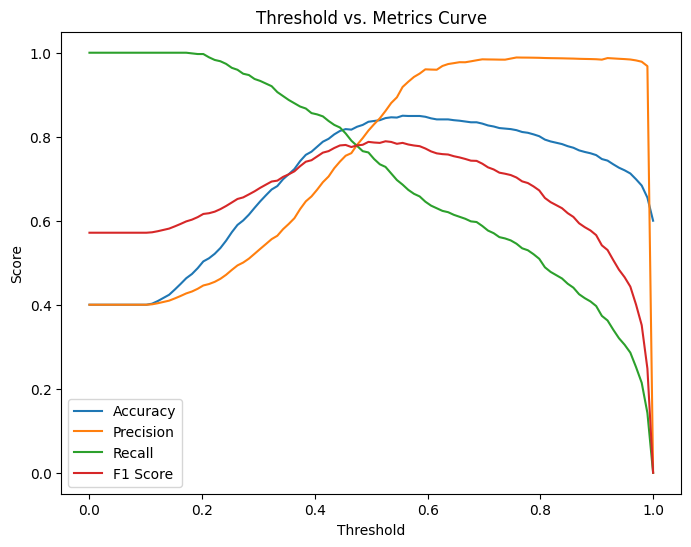

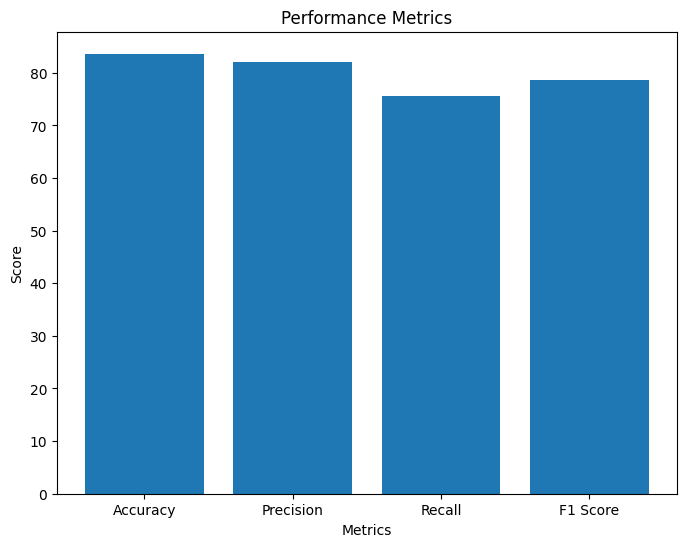

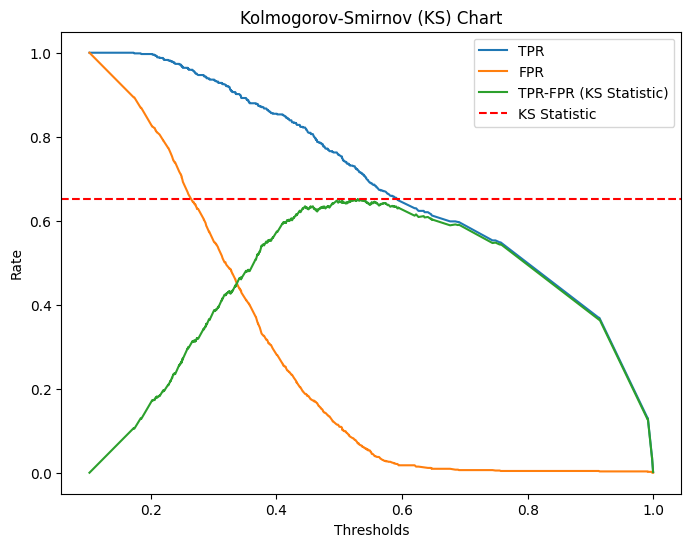

In [6]:

    test_dir = "C:\\Users\\hp\\Downloads\\Alzheimer_s Dataset\\test"
    test_data, test_labels = [], []



    for i in ["/NORMAL/", "/DEMENTED/"]:
        for image in (os.listdir(test_dir + i)):
            image = plt.imread(test_dir + i + image)
            image = cv2.resize(image, (224, 224))
            image = np.dstack([image, image, image])
            image = image.astype("float32") / 255
            if i == "/NORMAL/":
                label = 1
            elif i == "/DEMENTED/":
                label = 0
            test_data.append(image)
            test_labels.append(label)

    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    
    
    predictions = model.predict(test_data)
    conf_m = confusion_matrix(test_labels, np.round(predictions))
    plt.figure(figsize=(6, 6))
plt.imshow(conf_m, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(unique_labels(test_labels)))
plt.xticks(tick_marks, ['NORMAL', 'DEMENTED'])
plt.yticks(tick_marks, ['NORMAL', 'DEMENTED'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
    
    
# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(test_labels, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_curve.png')

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(test_labels, predictions)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('precision_recall_curve.png')

# Threshold vs. Metrics Curve
thresholds = np.linspace(0, 1, 100)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

    for threshold in thresholds:
        y_pred = (predictions >= threshold).astype(int)
        accuracy_list.append(accuracy_score(test_labels, y_pred))
        precision_list.append(precision_score(test_labels, y_pred))
        recall_list.append(recall_score(test_labels, y_pred))
        f1_list.append(f1_score(test_labels, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1 Score')
plt.legend()
plt.title('Threshold vs. Metrics Curve')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.savefig('threshold_metrics_curve.png')
    
    
    acc = accuracy_score(test_labels, np.round(predictions)) * 100
    tn, fp, fn, tp = conf_m.ravel()
    
    accuracy = acc
    precision = tp / (tp + fp) * 100
    recall = tp / (tp + fn) * 100
    f1 = (2 * precision * recall / (precision + recall))



    print("Accuracy: {}%".format(accuracy))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-score: {}".format(f1))


    x = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    y = [accuracy, precision, recall, f1]
    plt.figure(figsize=(8, 6))
    plt.bar(x, y)
    plt.title('Performance Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.savefig('performance_metrics.png')

# Kolmogorov-Smirnov Chart
ks_statistic = max(tpr - fpr)
plt.figure(figsize=(8, 6))
plt.plot(thresholds_roc, tpr, label='TPR')
plt.plot(thresholds_roc, fpr, label='FPR')
plt.plot(thresholds_roc, tpr - fpr, label='TPR-FPR (KS Statistic)')
plt.axhline(y=ks_statistic, color='r', linestyle='--', label='KS Statistic')
plt.title('Kolmogorov-Smirnov (KS) Chart')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.savefig('ks_chart.png')

# Print KS Statistic
print("KS Statistic: {}".format(ks_statistic))